In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd

# Punto 2

In [19]:
#extraer información del excel y leer el excel
path = 'city_data.xlsx'
df = pd.read_excel(path)
#df

In [29]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['GDP (USD Billion)', 'Population (Millions)']])

pca = PCA(n_components=1)
pca_result = pca.fit_transform(scaled_data)

# Añadir el resultado al DataFrame
df['PCA'] = pca_result
print(df[['City', 'PCA']])

                     City       PCA
0                  Bogotá  6.850255
1                Medellín  2.254291
2                    Cali  1.289861
3            Barranquilla  0.555999
4               Cartagena  0.222155
5      Bucaramanga (test) -0.132641
6                 Pereira -0.225528
7           Cúcuta (test) -0.116400
8           Ibagué (test) -0.249507
9             Santa Marta -0.283715
10              Manizales -0.338784
11          Villavicencio -0.312404
12                  Pasto -0.349820
13               Montería -0.335778
14             Valledupar -0.353633
15                  Neiva -0.428262
16                Popayán -0.446117
17                Armenia -0.469289
18              Sincelejo -0.483533
19                  Tunja -0.506704
20              Florencia -0.536897
21               Riohacha -0.533487
22                 Quibdó -0.588556
23             San Andrés -0.618748
24                  Yopal -0.585146
25                Leticia -0.641920
26          Arauca (test) -0

# Punto 2.1

In [57]:
# Extraer las dos variables
x1 = df['GDP (USD Billion)']
x2 = df['Population (Millions)']

# Crear la matriz de covarianza
cov_matrix = np.cov(x1, x2)

def calcular_media(datos):
    return sum(datos) / len(datos) if len(datos) > 0 else 0
    
def calcular_desviacion_estandar(datos):
    n = len(datos)
    if n == 0:
        return None
    media = calcular_media(datos)
    varianza = sum((x - media) ** 2 for x in datos) / n
    return math.sqrt(varianza)
    
def calcular_covarianza(X1, X2):
    n = len(X1)
    
    if n != len(X2) or n == 0:
        return None  # Verifica que ambas listas tengan el mismo tamaño y no estén vacías
    
    # Calcular las medias
    media_X1 = sum(X1) / n
    media_X2 = sum(X2) / n
    
    # Calcular la covarianza
    covarianza = sum((X1[i] - media_X1) * (X2[i] - media_X2) for i in range(n)) / n
    
    return covarianza

valor1 = calcular_covarianza(x1, x2)
valor2 = calcular_covarianza(x1, x1)
valor3 = calcular_covarianza(x2, x2)
matriz = [[valor2, valor1],[valor1, valor3]]
print(matriz)
# Mostrar la matriz de covarianza
print(cov_matrix)

[[383.3651666666667, 25.79571666666666], [25.79571666666666, 1.7691489999999999]]
[[396.58465517  26.68522414]
 [ 26.68522414   1.83015414]]


# Punto 2.2

In [71]:
# Calcular los eigenvalues y eigenvectors
eigenvalues, eigenvectores = np.linalg.eig(cov_matrix)

# Mostrar los eigenvalues
print("Eigenvalues:", eigenvalues)

Eigenvalues: [3.98380395e+02 3.44139937e-02]


# Punto 2.3

In [67]:
# Calcular varianza Explicada 
varianza_explicada = eigenvalues / np.sum(eigenvalues)
print(varianza_explicada)

[9.99913623e-01 8.63772954e-05]


# Punto 2.4

In [73]:
# Mostrar el eigen vector previamente definido
print(eigenvectores)

[[ 0.99774346 -0.06714158]
 [ 0.06714158  0.99774346]]


# Punto 2.5

In [86]:
# Proyectar los datos estandarizados en los eigenvectores
data_projected = np.dot(scaled_data, eigenvectores)

# Mostrar la matriz proyectada
print("Matriz proyectada:\n", data_projected)

Matriz proyectada:
 [[ 5.15381062  4.51267902]
 [ 1.89419666  1.25826945]
 [ 0.77124478  1.0776375 ]
 [ 0.43540102  0.34671042]
 [ 0.10426971  0.21828795]
 [-0.08151144 -0.10829742]
 [-0.14261314 -0.17953839]
 [-0.1845329   0.03427014]
 [-0.21143043 -0.13723108]
 [-0.25270164 -0.14198907]
 [-0.26743634 -0.20881496]
 [-0.27919023 -0.15527711]
 [-0.29700158 -0.19175488]
 [-0.30517403 -0.16106384]
 [-0.31637521 -0.17538061]
 [-0.33772008 -0.2643675 ]
 [-0.34892126 -0.27868428]
 [-0.36062723 -0.30050236]
 [-0.3667326  -0.31516205]
 [-0.37843857 -0.33698013]
 [-0.38605832 -0.37414373]
 [-0.39524035 -0.3584553 ]
 [-0.40997505 -0.42528119]
 [-0.41759479 -0.46244479]
 [-0.41915707 -0.40959276]
 [-0.42930076 -0.48426287]
 [-0.4328822  -0.46141605]
 [-0.43999715 -0.49107835]
 [-0.44660732 -0.51323934]
 [-0.45170312 -0.51289643]]


# Punto 2.6

In [96]:
# Reconstruir los datos
data_reconstructed = np.dot(data_projected, eigenvectores.T)

# Calcular el error cuadrático medio entre los datos originales y reconstruidos
mse = mean_squared_error(data_standardized, data_reconstructed)
print(mse)

7.701492921050745e-32


# Punto 2.7

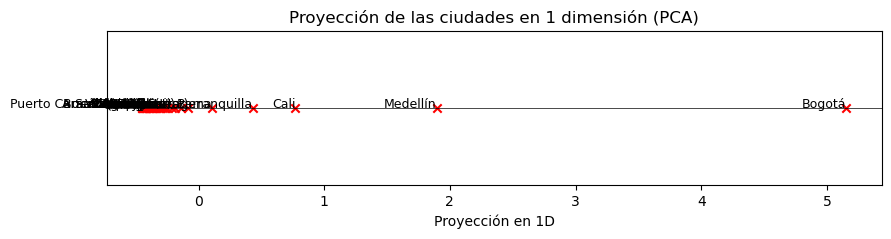

In [106]:
# Proyectar en el primer componente principal (usando el primer eigenvector)
data_projected_1D = np.dot(scaled_data, eigenvectores[:, 0])

# Crear el gráfico en 1D
plt.figure(figsize=(10, 2))
plt.scatter(data_projected_1D, np.zeros_like(data_projected_1D), marker='x', color='r')

# Etiquetas de las ciudades
for i, city in enumerate(df['City']):
    plt.text(data_projected_1D[i], 0, city, fontsize=9, ha='right')

# Configuración del gráfico
plt.axhline(0, color='black', linewidth=0.5)
plt.yticks([])  # Ocultar el eje Y
plt.xlabel('Proyección en 1D')
plt.title('Proyección de las ciudades en 1 dimensión (PCA)')

plt.show()